In [7]:
import warnings
warnings.simplefilter('ignore')

# Dependencies
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [8]:
# Importing the dataset
df = pd.read_csv('data/df_cluster_analysis.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Columns: 180 entries, lab_name to avg_nb_tooth_92_per_case
dtypes: float64(169), int64(9), object(2)
memory usage: 662.4+ KB


In [4]:
df.isnull().sum()

lab_name                             0
subscriber_plan_name                 0
nb_subscriber_features               0
total_nb_cases                       0
avg_nb_cases_per_month               0
avg_nb_cases_per_day                 0
total_nb_units                       0
avg_nb_units_per_month               0
avg_nb_units_per_day                 0
avg_nb_units_per_case                0
total_nb_products                    0
avg_nb_products_per_month            0
avg_nb_products_per_day              0
avg_nb_products_per_case             0
avg_nb_products_per_unit             0
total_nb_product_types               0
avg_nb_product_types_per_month       0
avg_nb_product_types_per_day         0
avg_nb_product_types_per_case        0
avg_nb_product_types_per_unit        0
total_nb_other_settings              0
avg_nb_other_settings_per_month      0
avg_nb_other_settings_per_day        0
avg_nb_other_settings_per_case       0
avg_nb_other_settings_per_unit       0
total_nb_other_products  

In [10]:
df.head()

,lab_name,subscriber_plan_name,nb_subscriber_features,total_nb_cases,avg_nb_cases_per_month,avg_nb_cases_per_day,total_nb_units,avg_nb_units_per_month,avg_nb_units_per_day,avg_nb_units_per_case,...,avg_nb_tooth_90_per_day,avg_nb_tooth_90_per_case,total_nb_tooth_91,avg_nb_tooth_91_per_month,avg_nb_tooth_91_per_day,avg_nb_tooth_91_per_case,total_nb_tooth_92,avg_nb_tooth_92_per_month,avg_nb_tooth_92_per_day,avg_nb_tooth_92_per_case
0,3DDENTALLABORATORIES,Standard,16,2971,123.791667,6.463748,4455,185.625000,9.641180,1.507250,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,3DENTAL,StarterLegacy,19,2343,34.455882,3.184887,3433,50.485294,4.645158,1.638398,...,0.689914,0.173824,345.0,5.073529,0.471851,0.123728,171.0,2.514706,0.252117,0.056688
2,3DLABSMT,Starter,8,64,21.333333,6.000000,113,37.666667,10.966667,1.800635,...,0.566667,0.103757,2.0,0.666667,0.200000,0.028571,19.0,6.333333,1.700000,0.249471
3,3LLABORATORIES,Standard2,8,1936,276.571429,17.630179,2720,388.571429,24.741950,1.452787,...,0.513152,0.070132,33.0,4.714286,0.319006,0.070722,12.0,1.714286,0.079777,0.008106
4,AAA,StarterLegacy,19,10949,243.311111,12.504408,17471,388.244444,19.947611,1.743776,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [11]:
df_clusters = df[['nb_subscriber_features', 'days_subscribed', 'avg_nb_cases_per_month', 'avg_nb_units_per_month',
                 'avg_nb_other_settings_per_month',
                 'avg_nb_other_products_per_month', 'avg_nb_clients_per_month', 'avg_nb_shipping_zipcodes_per_month']]

df_clusters2 = df[['nb_subscriber_features', 'days_subscribed', 'avg_nb_cases_per_month', 'avg_nb_units_per_month',
                 'avg_nb_other_settings_per_month',
                 'avg_nb_other_products_per_month', 'avg_nb_clients_per_month', 'avg_nb_shipping_zipcodes_per_month',
                 'avg_nb_tooth_0_per_month', 'avg_nb_tooth_1_per_month', 'avg_nb_tooth_2_per_month',
                'avg_nb_tooth_3_per_month', 'avg_nb_tooth_4_per_month', 'avg_nb_tooth_5_per_month',
                'avg_nb_tooth_6_per_month', 'avg_nb_tooth_7_per_month', 'avg_nb_tooth_8_per_month',
                'avg_nb_tooth_9_per_month', 'avg_nb_tooth_10_per_month', 'avg_nb_tooth_11_per_month',
                'avg_nb_tooth_12_per_month', 'avg_nb_tooth_13_per_month', 'avg_nb_tooth_14_per_month',
                'avg_nb_tooth_15_per_month', 'avg_nb_tooth_16_per_month', 'avg_nb_tooth_17_per_month',
                'avg_nb_tooth_18_per_month', 'avg_nb_tooth_19_per_month', 'avg_nb_tooth_20_per_month',
                'avg_nb_tooth_21_per_month', 'avg_nb_tooth_22_per_month', 'avg_nb_tooth_23_per_month',
                'avg_nb_tooth_24_per_month', 'avg_nb_tooth_25_per_month', 'avg_nb_tooth_26_per_month',
                'avg_nb_tooth_27_per_month', 'avg_nb_tooth_28_per_month', 'avg_nb_tooth_29_per_month',
                'avg_nb_tooth_30_per_month', 'avg_nb_tooth_31_per_month', 'avg_nb_tooth_32_per_month',
                'avg_nb_tooth_90_per_month', 'avg_nb_tooth_91_per_month', 'avg_nb_tooth_91_per_month']]

# K-Means Clustering

## With df_clusters

In [15]:
# Peeking at the dataset
df_clusters.head().T

,0,1,2,3,4
nb_subscriber_features,16.000000,19.000000,8.000000,8.000000,19.000000
days_subscribed,675.000000,2042.000000,46.000000,172.000000,1648.000000
avg_nb_cases_per_month,123.791667,34.455882,21.333333,276.571429,243.311111
avg_nb_units_per_month,185.625000,50.485294,37.666667,388.571429,388.244444
avg_nb_other_settings_per_month,35.750000,17.735294,0.000000,29.857143,17.000000
avg_nb_other_products_per_month,21.375000,0.000000,0.000000,0.000000,0.000000
avg_nb_clients_per_month,123.791667,34.455882,21.333333,276.571429,243.311111
avg_nb_shipping_zipcodes_per_month,123.791667,32.455882,21.333333,276.571429,243.288889


In [53]:
df_clusters2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 44 columns):
nb_subscriber_features                471 non-null int64
days_subscribed                       471 non-null int64
avg_nb_cases_per_month                471 non-null float64
avg_nb_units_per_month                471 non-null float64
avg_nb_other_settings_per_month       471 non-null float64
avg_nb_other_products_per_month       471 non-null float64
avg_nb_clients_per_month              471 non-null float64
avg_nb_shipping_zipcodes_per_month    471 non-null float64
avg_nb_tooth_0_per_month              471 non-null float64
avg_nb_tooth_1_per_month              471 non-null float64
avg_nb_tooth_2_per_month              471 non-null float64
avg_nb_tooth_3_per_month              471 non-null float64
avg_nb_tooth_4_per_month              471 non-null float64
avg_nb_tooth_5_per_month              471 non-null float64
avg_nb_tooth_6_per_month              471 non-null float64
avg_nb_tooth_7

In [54]:
# Descriptive stats of the variables in data
df_clusters2.describe()

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,avg_nb_tooth_0_per_month,avg_nb_tooth_1_per_month,...,avg_nb_tooth_26_per_month,avg_nb_tooth_27_per_month,avg_nb_tooth_28_per_month,avg_nb_tooth_29_per_month,avg_nb_tooth_30_per_month,avg_nb_tooth_31_per_month,avg_nb_tooth_32_per_month,avg_nb_tooth_90_per_month,avg_nb_tooth_91_per_month,avg_nb_tooth_91_per_month
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,15.150743,1029.439490,319.041137,517.720308,45.251366,16.542025,319.041038,294.123682,0.011419,2.571178,...,4.151576,4.250800,6.298883,12.604335,26.015046,17.160500,1.004265,60.364877,32.001398,32.001398
std,6.706982,687.933408,423.013242,667.611535,145.053267,97.848408,423.013186,398.531079,0.044081,14.327888,...,7.168260,7.447167,9.910988,18.044784,36.491714,24.790000,2.246916,147.165148,71.647972,71.647972
min,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,423.500000,71.202381,125.759740,0.000000,0.000000,71.202381,62.678082,0.000000,0.038099,...,0.477273,0.426743,0.812637,1.600000,3.023256,1.966667,0.053813,0.960603,0.256579,0.256579
50%,17.000000,998.000000,178.272727,306.247059,2.716981,0.000000,178.272727,160.428571,0.000000,0.232558,...,2.086957,2.023810,3.139535,6.166667,13.634146,8.547619,0.377358,11.857143,5.326087,5.326087
75%,20.000000,1571.000000,394.589853,629.550794,29.928571,1.922392,394.589853,377.845173,0.000000,0.802985,...,4.614087,4.739130,7.427083,15.228333,32.149360,21.296190,1.060662,62.819205,33.304656,33.304656
max,23.000000,2865.000000,3387.552632,4682.343750,1632.131579,1610.774194,3387.552632,3175.354839,0.595238,237.000000,...,66.333333,70.547170,79.490566,136.705882,325.607843,228.392157,29.387500,2117.552632,950.736842,950.736842


## Determine optimal K ... 4, 5 or 6?

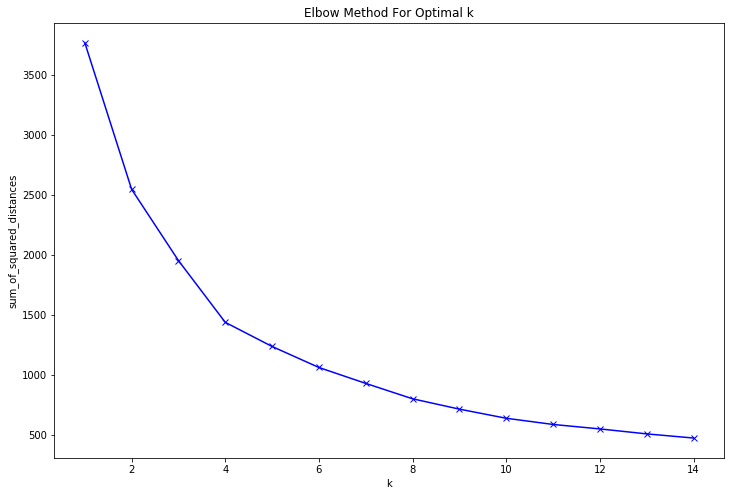

In [12]:
# Using StandardScaler instead:
df1_scaler = StandardScaler().fit(df_clusters)
df1_scaled = df1_scaler.transform(df_clusters)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1_scaled)
    sum_of_squared_distances.append(km.inertia_)

# Plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Fit K-Means to the dataset - with k=5

In [16]:
# Using 'df1_scaled' and 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_scaled)
# beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to df1
df_clusters['cluster_scaled_5k'] = cluster
# Mean of clusters
kmeans_mean_cluster_5 = pd.DataFrame(round(df_clusters.groupby('cluster_scaled_5k').mean(),1))
kmeans_mean_cluster_5

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,cluster_scaled_6k
cluster_scaled_5k,,,,,,,,,
1,19.4,1517.2,183.1,301.7,20.3,6.1,183.1,173.8,1.9
2,21.8,1316.7,1686.8,2801.9,37.4,19.1,1686.8,1393.2,3.0
3,8.4,424.6,139.2,229.6,13.3,5.5,139.2,132.7,5.9
4,23.0,948.0,3170.9,4032.7,1439.6,585.5,3170.9,3056.8,4.7
5,19.1,1218.7,702.7,1151.3,125.7,44.5,702.7,649.3,1.2


In [17]:
kmeans_mean_cluster_5.T

cluster_scaled_5k,1,2,3,4,5
nb_subscriber_features,19.4,21.8,8.4,23.0,19.1
days_subscribed,1517.2,1316.7,424.6,948.0,1218.7
avg_nb_cases_per_month,183.1,1686.8,139.2,3170.9,702.7
avg_nb_units_per_month,301.7,2801.9,229.6,4032.7,1151.3
avg_nb_other_settings_per_month,20.3,37.4,13.3,1439.6,125.7
avg_nb_other_products_per_month,6.1,19.1,5.5,585.5,44.5
avg_nb_clients_per_month,183.1,1686.8,139.2,3170.9,702.7
avg_nb_shipping_zipcodes_per_month,173.8,1393.2,132.7,3056.8,649.3
cluster_scaled_6k,1.9,3.0,5.9,4.7,1.2


## Fit K-Means to the dataset - with k=6

In [14]:
# Using 'df1_scaled' and 6 clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_scaled)
# beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to df1
df_clusters['cluster_scaled_6k'] = cluster
# Mean of clusters
kmeans_mean_cluster_6 = pd.DataFrame(round(df_clusters.groupby('cluster_scaled_6k').mean(),1))
kmeans_mean_cluster_6

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month
cluster_scaled_6k,,,,,,,,
1,19.0,1161.7,625.7,1027.8,106.2,39.2,625.7,575.8
2,19.4,1542.2,170.9,281.1,17.8,6.3,170.9,161.5
3,20.7,1275.3,1490.8,2478.9,97.9,24.9,1490.8,1291.5
4,23.0,886.0,3179.7,4317.8,1075.5,1610.8,3179.7,3175.4
5,23.0,979.0,3166.4,3890.1,1621.7,72.9,3166.4,2997.5
6,8.3,427.6,132.2,216.3,13.4,5.2,132.2,125.9


In [15]:
kmeans_mean_cluster_6.T

cluster_scaled_6k,1,2,3,4,5,6
nb_subscriber_features,19.0,19.4,20.7,23.0,23.0,8.3
days_subscribed,1161.7,1542.2,1275.3,886.0,979.0,427.6
avg_nb_cases_per_month,625.7,170.9,1490.8,3179.7,3166.4,132.2
avg_nb_units_per_month,1027.8,281.1,2478.9,4317.8,3890.1,216.3
avg_nb_other_settings_per_month,106.2,17.8,97.9,1075.5,1621.7,13.4
avg_nb_other_products_per_month,39.2,6.3,24.9,1610.8,72.9,5.2
avg_nb_clients_per_month,625.7,170.9,1490.8,3179.7,3166.4,132.2
avg_nb_shipping_zipcodes_per_month,575.8,161.5,1291.5,3175.4,2997.5,125.9


## Hierarchical Clustering - 6 clusters

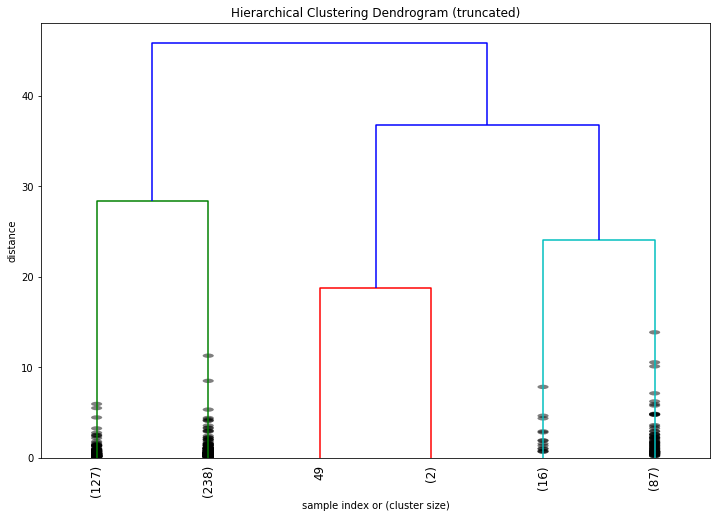

In [43]:
# Using 'df2_standardized' 
# Creating the linkage matrix
H_cluster = linkage(df2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

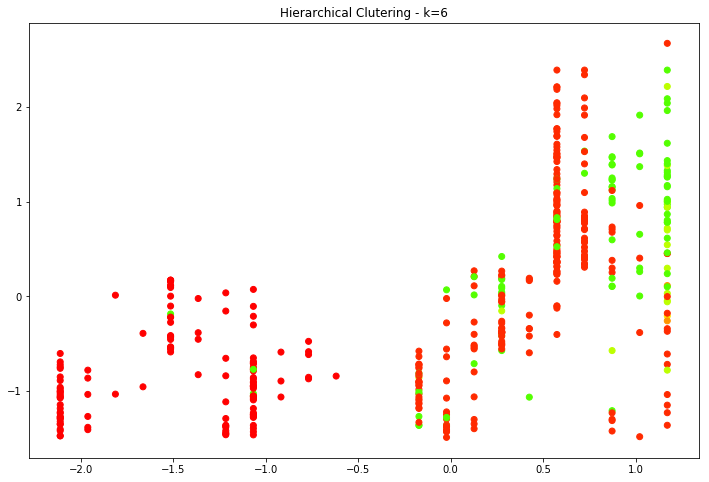

In [44]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
k=6
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
#cluster_2[0:30:,]
#plt.figure(figsize=(10, 8))
plt.scatter(df2_standardized.iloc[:,0], df2_standardized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Hierarchical Clutering - k=6')
plt.show()

In [41]:
df2_standardized

,0,1,2,3,4,5,6,7
0,0.126757,-0.515771,-0.462059,-0.497967,-0.065572,0.049445,-0.462059,-0.427854
1,0.574528,1.473452,-0.673473,-0.700605,-0.189898,-0.169237,-0.673472,-0.657279
2,-1.067298,-1.431076,-0.704527,-0.719826,-0.312295,-0.169237,-0.704527,-0.685217
3,-1.067298,-1.247724,-0.100505,-0.193655,-0.106241,-0.169237,-0.100505,-0.044089
4,0.574528,0.900114,-0.179216,-0.194145,-0.194973,-0.169237,-0.179215,-0.127691
5,1.171556,-0.719496,0.318135,0.779039,0.095974,-0.169237,0.318136,0.399740
6,0.574528,1.207155,-0.691308,-0.648609,-0.311962,-0.169237,-0.691308,-0.671348
7,0.723785,2.094812,-0.308096,-0.372367,0.079021,-0.169237,-0.308096,-0.275306
8,0.574528,0.735679,-0.723910,-0.735820,-0.242296,-0.169237,-0.723910,-0.705791
9,0.723785,2.388757,-0.362789,-0.403020,-0.228156,-0.165734,-0.362788,-0.367011


## Hierarchical Clustering - 5 clusters

In [25]:
# Creating a dataset for hierarchical clustering
df2_standardized = df1_standardized
df2_scaled = df1_scaled

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

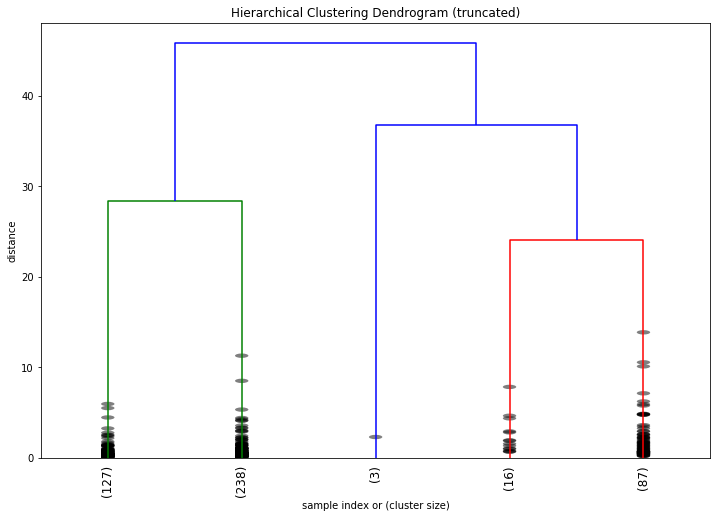

In [26]:
# Using 'df2_standardized' 
# Creating the linkage matrix
H_cluster = linkage(df2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,)  # to get a distribution impression in truncated branches)
plt.show()

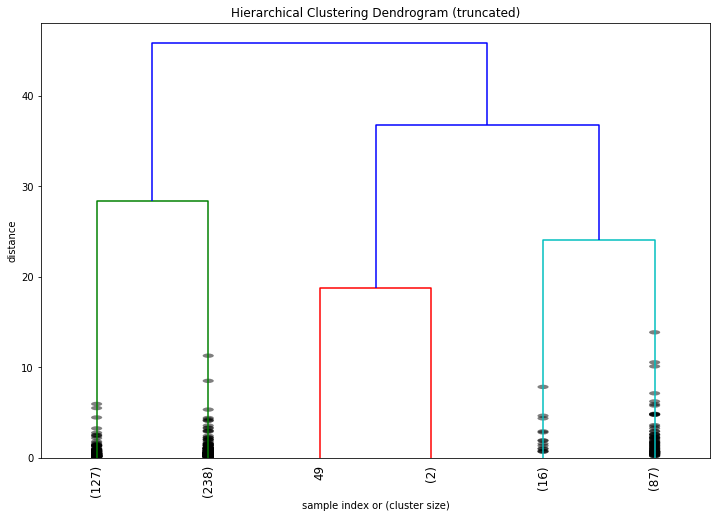

In [35]:
# Using 'df2_scaled' 
# Creating the linkage matrix
H_cluster = linkage(df2_scaled,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

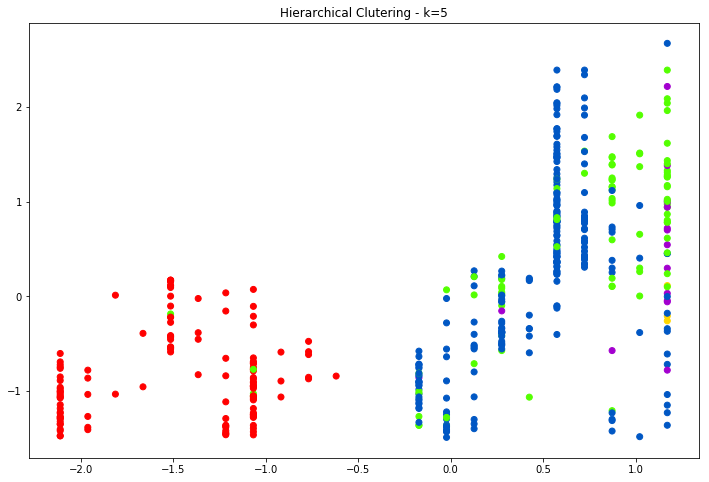

In [28]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
#cluster_2[0:30:,]
#plt.figure(figsize=(10, 8))
plt.scatter(df2_standardized.iloc[:,0], df2_standardized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Hierarchical Clutering - k=5')
plt.show()


In [31]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
k=5
cluster_3 = fcluster(H_cluster, k, criterion='maxclust')
cluster_3[0:30:,]
#plt.figure(figsize=(10, 8))
plt.scatter(df2_scaled.iloc[:,0], df2_scaled.iloc[:,1],c=cluster_3, cmap='prism')  # plot points with cluster dependent colors
plt.title('Hierarchical Clutering - k=5')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [32]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
df2=df1
df2['cluster'] = cluster_Hierarchical
# Mean of clusters
hierarchical_mean_cluster = pd.DataFrame(round(df2.groupby('cluster').mean(),1))
hierarchical_mean_cluster

NameError: name 'df1' is not defined

In [114]:
kmeans_mean_cluster

,days_subscriber,nb_subscriber_features,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_charging_items_per_month,avg_nb_unique_product_id_per_month,avg_nb_unique_tooth_num_per_month,avg_nb_unique_tooth_types_per_month,avg_nb_unique_crown_types_per_month,avg_nb_unique_product_types_per_month,avg_nb_pto_per_month,avg_nb_additional_products_per_month,avg_nb_clients_per_month,avg_nb_over_client_estimate_per_month,avg_nb_under_payments
cluster,,,,,,,,,,,,,,,
1,1090.2,18.3,420.7,674.4,820.0,44.8,29.2,1.7,5.0,11.5,153.5,49.8,50.8,98.9,35.2
2,1292.1,17.9,178.0,290.8,310.7,18.8,27.6,1.9,3.9,6.7,37.1,25.9,18.7,33.5,10.1
3,570.9,11.0,98.0,145.2,148.0,13.3,13.0,1.2,2.5,4.5,21.9,21.5,13.3,13.2,5.8
4,1699.0,24.0,1492.6,2688.2,309106.7,84.0,34.7,2.0,6.5,22.1,7.8,0.6,136.8,931.1,72.8
5,1259.3,21.2,1146.8,1988.5,2152.8,60.1,33.3,1.9,5.2,13.9,217.7,171.2,102.0,174.9,50.6
6,491.0,10.0,379.7,1116.1,2067.5,37.4,31.9,1.4,6.0,11.1,94.3,5055.6,80.7,107.3,82.5
7,799.7,21.3,2054.4,2690.7,4711.4,63.3,17.0,1.3,4.5,11.4,2612.5,574.4,247.3,776.2,141.9


# Save to CSV

In [62]:
df_clusters.drop('cluster_standardized_5k', axis=1, inplace=True)
df_clusters.drop('cluster_scaled_wTooth4k', axis=1, inplace=True)
df_clusters.head()

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,cluster_scaled_5k,cluster_scaled_6k
0,16,675,123.791667,185.625000,35.750000,21.375,123.791667,123.791667,3,6
1,19,2042,34.455882,50.485294,17.735294,0.000,34.455882,32.455882,1,2
2,8,46,21.333333,37.666667,0.000000,0.000,21.333333,21.333333,3,6
3,8,172,276.571429,388.571429,29.857143,0.000,276.571429,276.571429,3,6
4,19,1648,243.311111,388.244444,17.000000,0.000,243.311111,243.288889,1,2


In [63]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
nb_subscriber_features                471 non-null int64
days_subscribed                       471 non-null int64
avg_nb_cases_per_month                471 non-null float64
avg_nb_units_per_month                471 non-null float64
avg_nb_other_settings_per_month       471 non-null float64
avg_nb_other_products_per_month       471 non-null float64
avg_nb_clients_per_month              471 non-null float64
avg_nb_shipping_zipcodes_per_month    471 non-null float64
cluster_scaled_5k                     471 non-null int32
cluster_scaled_6k                     471 non-null int32
dtypes: float64(6), int32(2), int64(2)
memory usage: 33.2 KB


In [64]:
df_clusters['lab_name'] = df['lab_name']
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 11 columns):
nb_subscriber_features                471 non-null int64
days_subscribed                       471 non-null int64
avg_nb_cases_per_month                471 non-null float64
avg_nb_units_per_month                471 non-null float64
avg_nb_other_settings_per_month       471 non-null float64
avg_nb_other_products_per_month       471 non-null float64
avg_nb_clients_per_month              471 non-null float64
avg_nb_shipping_zipcodes_per_month    471 non-null float64
cluster_scaled_5k                     471 non-null int32
cluster_scaled_6k                     471 non-null int32
lab_name                              471 non-null object
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 36.9+ KB


In [65]:
df_clusters.to_csv('data/clusters_REAL_names.csv', index=False, header=True)

In [73]:
clusters = pd.read_csv("data/clusters_REAL_names.csv")
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 11 columns):
nb_subscriber_features                471 non-null int64
days_subscribed                       471 non-null int64
avg_nb_cases_per_month                471 non-null float64
avg_nb_units_per_month                471 non-null float64
avg_nb_other_settings_per_month       471 non-null float64
avg_nb_other_products_per_month       471 non-null float64
avg_nb_clients_per_month              471 non-null float64
avg_nb_shipping_zipcodes_per_month    471 non-null float64
cluster_scaled_5k                     471 non-null int64
cluster_scaled_6k                     471 non-null int64
lab_name                              471 non-null object
dtypes: float64(6), int64(4), object(1)
memory usage: 40.6+ KB


In [74]:
clusters.head()

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,cluster_scaled_5k,cluster_scaled_6k,lab_name
0,16,675,123.791667,185.625000,35.750000,21.375,123.791667,123.791667,3,6,3DDENTALLABORATORIES
1,19,2042,34.455882,50.485294,17.735294,0.000,34.455882,32.455882,1,2,3DENTAL
2,8,46,21.333333,37.666667,0.000000,0.000,21.333333,21.333333,3,6,3DLABSMT
3,8,172,276.571429,388.571429,29.857143,0.000,276.571429,276.571429,3,6,3LLABORATORIES
4,19,1648,243.311111,388.244444,17.000000,0.000,243.311111,243.288889,1,2,AAA


In [75]:
plan_id = subcribers[['lab_name', 'subscriber_plan_id']]
plan_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
lab_name              478 non-null object
subscriber_plan_id    478 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [76]:
clusters = pd.merge(clusters, plan_id, how='left', on=['lab_name'])
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 12 columns):
nb_subscriber_features                471 non-null int64
days_subscribed                       471 non-null int64
avg_nb_cases_per_month                471 non-null float64
avg_nb_units_per_month                471 non-null float64
avg_nb_other_settings_per_month       471 non-null float64
avg_nb_other_products_per_month       471 non-null float64
avg_nb_clients_per_month              471 non-null float64
avg_nb_shipping_zipcodes_per_month    471 non-null float64
cluster_scaled_5k                     471 non-null int64
cluster_scaled_6k                     471 non-null int64
lab_name                              471 non-null object
subscriber_plan_id                    471 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.8+ KB


In [77]:
clusters.to_csv('data/clusters_REAL_names.csv', index=False, header=True)

In [78]:
# Anonymize
# Load data
codes = pd.read_csv('data/code_names.csv')
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 2 columns):
lab_name    471 non-null object
new_name    471 non-null object
dtypes: object(2)
memory usage: 7.4+ KB


In [79]:
df_clusters = pd.merge(clusters, codes, how='left', on=['lab_name'])
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 13 columns):
nb_subscriber_features                471 non-null int64
days_subscribed                       471 non-null int64
avg_nb_cases_per_month                471 non-null float64
avg_nb_units_per_month                471 non-null float64
avg_nb_other_settings_per_month       471 non-null float64
avg_nb_other_products_per_month       471 non-null float64
avg_nb_clients_per_month              471 non-null float64
avg_nb_shipping_zipcodes_per_month    471 non-null float64
cluster_scaled_5k                     471 non-null int64
cluster_scaled_6k                     471 non-null int64
lab_name                              471 non-null object
subscriber_plan_id                    471 non-null int64
new_name                              471 non-null object
dtypes: float64(6), int64(5), object(2)
memory usage: 51.5+ KB


In [80]:
df_clusters.drop('lab_name', axis=1, inplace=True)
df_clusters.rename(columns={'new_name': 'lab_name'}, inplace=True)
df_clusters.head()

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,cluster_scaled_5k,cluster_scaled_6k,subscriber_plan_id,lab_name
0,16,675,123.791667,185.625000,35.750000,21.375,123.791667,123.791667,3,6,2,320S-D718
1,19,2042,34.455882,50.485294,17.735294,0.000,34.455882,32.455882,1,2,6,37L-D851
2,8,46,21.333333,37.666667,0.000000,0.000,21.333333,21.333333,3,6,1,38T-D685
3,8,172,276.571429,388.571429,29.857143,0.000,276.571429,276.571429,3,6,10,314S-L496
4,19,1648,243.311111,388.244444,17.000000,0.000,243.311111,243.288889,1,2,6,A3A-A290


In [87]:
#df_clusters['avg_nb_cases_per_month'] = df_clusters['avg_nb_cases_per_month'].apply(lambda x: round(x))
df_clusters['avg_nb_units_per_month'] = df_clusters['avg_nb_units_per_month'].apply(lambda x: round(x))
df_clusters['avg_nb_other_settings_per_month'] = df_clusters['avg_nb_other_settings_per_month'].apply(lambda x: round(x))
df_clusters['avg_nb_other_products_per_month'] = df_clusters['avg_nb_other_products_per_month'].apply(lambda x: round(x))
df_clusters['avg_nb_clients_per_month'] = df_clusters['avg_nb_clients_per_month'].apply(lambda x: round(x))
df_clusters['avg_nb_shipping_zipcodes_per_month'] = df_clusters['avg_nb_shipping_zipcodes_per_month'].apply(lambda x: round(x))
df_clusters.head()

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,cluster_scaled_5k,cluster_scaled_6k,subscriber_plan_id,lab_name
0,16,675,124,186,36,21,124,124,3,6,2,320S-D718
1,19,2042,34,50,18,0,34,32,1,2,6,37L-D851
2,8,46,21,38,0,0,21,21,3,6,1,38T-D685
3,8,172,277,389,30,0,277,277,3,6,10,314S-L496
4,19,1648,243,388,17,0,243,243,1,2,6,A3A-A290


In [91]:
df_clusters = df_clusters[['lab_name', 'subscriber_plan_id', 'nb_subscriber_features', 'days_subscribed',
                          'avg_nb_cases_per_month', 'avg_nb_units_per_month', 'avg_nb_other_settings_per_month',
                          'avg_nb_other_products_per_month', 'avg_nb_clients_per_month',
                           'avg_nb_shipping_zipcodes_per_month', 'cluster_scaled_5k', 'cluster_scaled_6k']]

df_clusters.rename(columns={'lab_name': 'lab_name', 'subscriber_plan_id': 'plan_id',
                            'nb_subscriber_features': 'nb_features', 'avg_nb_cases_per_month': 'nb_cases_month',
                            'avg_nb_units_per_month': 'nb_units_month',
                            'avg_nb_other_settings_per_month': 'nb_other_settings_month',
                            'avg_nb_other_products_per_month': 'nb_other_products_month',
                            'avg_nb_clients_per_month': 'nb_clients_month',
                            'avg_nb_shipping_zipcodes_per_month': 'nb_shipping_zipcodes_month',
                            'cluster_scaled_5k': 'cluster_5', 'cluster_scaled_6k': 'cluster_6'}, inplace=True)
df_clusters.head()

,lab_name,plan_id,nb_features,days_subscribed,nb_cases_month,nb_units_month,nb_other_settings_month,nb_other_products_month,nb_clients_month,nb_shipping_zipcodes_month,cluster_5,cluster_6
0,320S-D718,2,16,675,124,186,36,21,124,124,3,6
1,37L-D851,6,19,2042,34,50,18,0,34,32,1,2
2,38T-D685,1,8,46,21,38,0,0,21,21,3,6
3,314S-L496,10,8,172,277,389,30,0,277,277,3,6
4,A3A-A290,6,19,1648,243,388,17,0,243,243,1,2


In [92]:
# Save to csv
df_clusters.to_csv('data/CLUSTERS.csv', index=False)

In [4]:
# Add subscriber column
df_clusters = pd.read_csv("data/CLUSTERS.csv")
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 12 columns):
lab_name                      471 non-null object
plan_id                       471 non-null int64
nb_features                   471 non-null int64
days_subscribed               471 non-null int64
nb_cases_month                471 non-null int64
nb_units_month                471 non-null int64
nb_other_settings_month       471 non-null int64
nb_other_products_month       471 non-null int64
nb_clients_month              471 non-null int64
nb_shipping_zipcodes_month    471 non-null int64
cluster_5                     471 non-null int64
cluster_6                     471 non-null int64
dtypes: int64(11), object(1)
memory usage: 44.2+ KB


In [5]:
df_clusters.describe()

,plan_id,nb_features,days_subscribed,nb_cases_month,nb_units_month,nb_other_settings_month,nb_other_products_month,nb_clients_month,nb_shipping_zipcodes_month,cluster_5,cluster_6
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,6.571125,15.150743,1029.439490,319.044586,517.719745,45.248408,16.518047,319.044586,294.116773,2.518047,3.403397
std,2.550497,6.706982,687.933408,423.017549,667.622085,145.042326,97.839595,423.017549,398.525166,1.449576,2.105391
min,1.000000,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.000000,8.000000,423.500000,71.000000,125.500000,0.000000,0.000000,71.000000,62.500000,1.000000,2.000000
50%,6.000000,17.000000,998.000000,178.000000,306.000000,3.000000,0.000000,178.000000,160.000000,3.000000,2.000000
75%,8.500000,20.000000,1571.000000,394.500000,629.500000,30.000000,2.000000,394.500000,377.500000,3.000000,6.000000
max,11.000000,23.000000,2865.000000,3388.000000,4682.000000,1632.000000,1611.000000,3388.000000,3175.000000,5.000000,6.000000


In [52]:
kmeans_mean_cluster_5

,nb_subscriber_features,days_subscribed,avg_nb_cases_per_month,avg_nb_units_per_month,avg_nb_other_settings_per_month,avg_nb_other_products_per_month,avg_nb_clients_per_month,avg_nb_shipping_zipcodes_per_month,cluster_standardized_5k,cluster_scaled_6k
cluster_scaled_5k,,,,,,,,,,
1,19.4,1517.2,183.1,301.7,20.3,6.1,183.1,173.8,1.0,1.9
2,21.8,1316.7,1686.8,2801.9,37.4,19.1,1686.8,1393.2,2.0,3.0
3,8.4,424.6,139.2,229.6,13.3,5.5,139.2,132.7,3.0,5.9
4,23.0,948.0,3170.9,4032.7,1439.6,585.5,3170.9,3056.8,4.0,4.7
5,19.1,1218.7,702.7,1151.3,125.7,44.5,702.7,649.3,5.0,1.2


In [6]:
kmeans_mean_cluster_6.T

NameError: name 'kmeans_mean_cluster_6' is not defined